put description here later
"SpARCS-0035_totalall_Ks_1.obs_sed" look like, Columns:  lambda   flux_cat  err_cat   err_full tempa_z  

"compilation_SpARCS-0035.dat" looks like: PHOTCATID spec_z source(1=GOGREEN,2=GCLASS,3=SPT,4=FORS2,5=VIPERS,6=PRIMUS,7=SDSS,8=NED) quality distance/arcsec altspec_z altdistance/arcsec altsource altquality GOGREENSPECID

DONT FORGET THAT ZSPEC HAS DIFFERENT DIMENSIONS THAT THE REST

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import ascii


#To read in files with flux and template flux: each file is one galaxy, currently reads in the SpARCS0035 cluster, can modify for others
fluxpath = r'''C:\Users\Anna\PHOTOMETRY\BESTFIT_SEDs\EAZY\for_greg'''
#fluxpath = '/Users/grudnick/Work/GOGREEN/Data/Releases/v1.1/PHOTOMETRY/BESTFIT_SEDs/EAZY/for_greg/'
#Example file name: SpARCS-0035_totalall_Ks_1.obs_sed  - number varies from 1-4889 for SpARCS-0035
flux_dat_all = {} #initialize empty dictionary, not sure I still need this

#To read in spectroscopic redshift:
redpath = r'''C:\Users\Anna\PHOTOMETRY\SPECZ_MATCHED'''
#redpath = '/Users/grudnick/Work/GOGREEN/Data/Releases/v1.1/PHOTOMETRY/SPECZ_MATCHED/'
filename = redpath + "\compilation_SpARCS-0035.dat" 
red_dat = ascii.read(filename)
#print(red_dat[4881]['spec_z']) #prints redshift for galaxy 4881, but still is an ascii table

#To read in parameters for galaxies
parapath = r'''C:\Users\Anna\Learning-Python-master\SpARCS-0035_totalall_HAWKIKs.cat'''
para_dat = ascii.read(parapath)
#parameters
good_flux = 10**0.8 #good_flux corresponds to k band mag < 23
#Parameters for good photometry, redshift, and flux
indices = np.where((red_dat['spec_z'] > 0) & (para_dat['totmask'] == 0) & (para_dat['K_flag'] == 0) & (para_dat['K_star'] <0.97))# & (para_dat['HAWKIKs'] > good_flux))
indices = indices[0]
#print(izspec) #prints indices of good galaxies, pretty sure its a np array of ints

izspec = [x+1 for x in indices]
print(izspec)



[481, 1194, 1198, 1201, 1203, 1238, 1249, 1296, 1333, 1342, 1364, 1397, 1439, 1450, 1452, 1477, 1500, 1524, 1560, 1562, 1569, 1573, 1589, 1619, 1626, 1639, 1658, 1699, 1701, 1702, 1720, 1740, 1771, 1791, 1826, 1831, 1844, 1884, 1899, 1901, 1923, 1933, 1943, 1953, 1966, 1996, 2010, 2029, 2030, 2032, 2036, 2040, 2069, 2070, 2090, 2106, 2121, 2128, 2134, 2177, 2182, 2186, 2200, 2202, 2211, 2227, 2236, 2247, 2276, 2315, 2320, 2324, 2339, 2345, 2381, 2394, 2421, 2441, 2462, 2516, 2521, 2550, 2553, 2558, 2582, 2583, 2592, 2617, 2622, 2629, 2634, 2651, 2673, 2724, 2733, 2740, 2743, 2754, 2768, 2818, 2821, 2833, 2850, 2860, 2902, 2912, 2914, 2930, 2936, 2953, 2962, 3022, 3033, 3051, 3065, 3116, 3138, 3153, 3205, 3263, 3271, 3305, 3380, 3408, 3431, 3436, 3482, 3486, 3495, 3519, 3537, 3546, 3548, 3549, 3594, 3612, 3615, 3630, 3639, 3642, 3689, 3692, 3707, 3747, 3755, 3766, 3802, 3809, 3822, 3830, 3903, 3975, 4003, 4008, 4018, 4049, 4244, 4257, 4258, 4302, 4431, 4436, 4445, 4447, 4450, 4469, 4531

In [10]:
#Now in a loop, read in the sparcs files because theres a bunch, and while at it, add the zspec from the red_dat table
#for n in range(1, 4889): #don't do this, there are missing #'s '
for galaxy in izspec:
    #name = "\SpARCS-0035_totalall_Ks_" + str(n) + ".obs_sed" #Should build the file name from path to file name
    name = "\SpARCS-0035_totalall_Ks_" + str(galaxy) + ".obs_sed" #Should build the file name from path to file name
    imstr = fluxpath + name
    flux_dat = ascii.read(imstr) #will overwrite each time
    #Now we need to convert the ascii table to a numpy array so we can do numpy things to it
    flux_dat_all[str(galaxy)] = {} #initialize
    #Now here's all the columns:
    flux_dat_all[str(galaxy)]['lambda'] = np.array(flux_dat['lambda'])
    flux_dat_all[str(galaxy)]['flux_cat'] = np.array(flux_dat['flux_cat'])
    flux_dat_all[str(galaxy)]['err_cat'] = np.array(flux_dat['err_cat'])
    flux_dat_all[str(galaxy)]['err_full'] = np.array(flux_dat['err_full'])
    flux_dat_all[str(galaxy)]['tempa_z'] = np.array(flux_dat['tempa_z'])
    flux_dat_all[str(galaxy)]['tempa_zprior'] = np.array(flux_dat['tempa_zprior'])
    #To append flux_dat_all with redshifts from the above file:
    flux_dat_all[str(galaxy)]['zspec'] = np.array(red_dat[galaxy-1]['spec_z']) #unlike others, need to specify which galaxy with [n] because red_dat has all in one file

#print(flux_dat_all) #prints all info all galaxies
#print(flux_dat_all['4884']) #prints one galaxy, all columns
#print(flux_dat_all['481']['lambda']) #prints one galaxy, just lambdas
#print(flux_dat_all['481']['lambda'][0]) #prints one galaxy, just first(0th) lambda (which is currently the k band)
#print(flux_dat_all['4884']['zspec']) #prints one galaxy's zspec



[array(0.394), array(0.417), array(0.469), array(0.572), array(0.53), array(0.393), array(1.541), array(0.398), array(0.277), array(1.077), array(0.492), array(0.278), array(0.574), array(0.296), array(1.599), array(0.426), array(0.865), array(0.846), array(1.294), array(1.082), array(0.397), array(0.39), array(1.076), array(0.291), array(0.735), array(1.087), array(1.128), array(0.854), array(0.151), array(0.787), array(1.128), array(0.4), array(0.921), array(1.643), array(0.902), array(1.031), array(0.275), array(1.076), array(0.886), array(1.062), array(0.395), array(1.246), array(1.337), array(0.177), array(0.937), array(0.926), array(1.041), array(1.34), array(1.075), array(0.928), array(1.344), array(0.835), array(0.618), array(0.887), array(1.078), array(0.856), array(1.338), array(0.561), array(1.33), array(1.141), array(1.185), array(0.809), array(0.726), array(0.885), array(1.347), array(0.716), array(0.794), array(1.323), array(1.14), array(0.853), array(0.024), array(1.099)

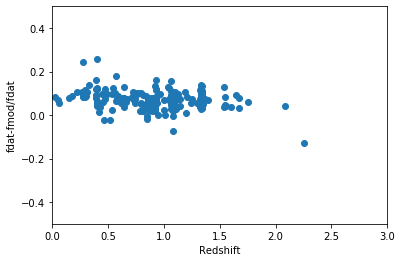

In [115]:
#Now I want to make a plot of residual flux versus redshift for cluster SpARCS-0035, in the K band
#First I will make an array of just the k band fluxes (template and observed)

k_dat = []
redshift = []
k_mod = []
for galaxy in izspec:
    i = 0
    redshift.append(flux_dat_all[str(galaxy)]['zspec'])
    k_dat.append(flux_dat_all[str(galaxy)]['flux_cat'][0]) #0th should be the k band catalog flux
    k_mod.append(flux_dat_all[str(galaxy)]['tempa_zprior'][0]) #0th should be the k band template flux

    
#Make residuals: (fdat - fmod) / f_dat vs. zspec
x=redshift
fdat = np.array(k_dat)
fmod = np.array(k_mod)
y = (fdat - fmod)/fdat
plt.scatter(x,y)
plt.xlabel("Redshift")
plt.ylabel("fdat-fmod/fdat")
plt.axis([0,3, -0.5, 0.5])#limits axes range

#print(np.average(y))

print(x)


